# Visualización Pasiva - COVID-19

## 1. Tomar datos del csv genereado en el TP3

In [1]:
import pandas as pd
from datetime import datetime

In [41]:
# Borro las columnas que no me sirven
def eliminar_columnas(ruta):
    datos = pd.read_csv(ruta)
    df = pd.DataFrame(datos)
    df.drop(['code','name','pop_dens','total_pop','country_percentage','dia_inicio','dia_cuarentena','ciudad','tot_fallecidos','transmision_tipo','informe_tipo','fuente'], axis='columns', inplace=True)
    df.to_csv('datos_sin_columna.csv', index=False)


ruta_csv = 'innerjoins.csv'
eliminar_columnas(ruta_csv)


In [62]:
datos = pd.read_csv('datos_sin_columna.csv')
df = pd.DataFrame(datos)
df

,fecha,provincia,tot_casosconf,nue_casosconf
0,5/03/2020,Buenos Aires,2,1
1,8/03/2020,Buenos Aires,10,8
2,10/03/2020,Buenos Aires,20,1
3,11/03/2020,Buenos Aires,22,1
4,13/03/2020,Buenos Aires,34,1
...,...,...,...,...
1891,6/07/2020,Tierra del Fuego,80447,0
1892,7/07/2020,Tierra del Fuego,83426,0
1893,8/07/2020,Tierra del Fuego,87029,0
1894,9/07/2020,Tierra del Fuego,90692,1


## 2. Busco las 10 provincias con mas casos

In [63]:
group_a = df.groupby('provincia')

tot_casos_p = []
for key, item in group_a:
    tot_casos_p.append({"provincia":key, "total_casos":item['nue_casosconf'].sum()})


In [64]:
tot_casos_p.sort(key=lambda c: c['total_casos'], reverse=True)
print("10 provincias con mas casos\n")

for i in range(10):    
    print(tot_casos_p[i]['provincia'])

10 provincias con mas casos

Buenos Aires
CABA
Chaco
Río Negro
Córdoba
Neuquén
Santa Fe
Entre Ríos
Jujuy
Mendoza


## 3. Borro del DF las provincias que no me interesan

In [114]:
provincias_borrar = ['Chubut','Catamarca', 'Corrientes','Formosa','La Pampa', 'La Rioja','Misiones','Salta', 'San Juan','San Luis','Santa Cruz', 'Santiago del Estero','Tierra del Fuego', 'Tucumán']

for provin in provincias_borrar:
    df = df.drop(df[df['provincia']==provin].index)

group_a = df.groupby('provincia')

tot_casos_p = []
for key, item in group_a:
    tot_casos_p.append({"provincia":key, "total_casos":item['nue_casosconf'].sum()})
tot_casos_p.sort(key=lambda c: c['total_casos'], reverse=True)


## 4. Parseo la fecha y la agrego al df (para poder agrupar los datos en los graficos)

In [111]:

separados = df['fecha'].str.split('/')
dias = []
meses = []
anios = []
for f in separados:
    dias.append(f[0])

for f in separados:
    meses.append(f[1])

for f in separados:
    anios.append(f[2])
    


In [112]:
df['dia'] = dias
df['mes'] = meses
df['anio'] = anios

df

,fecha,provincia,tot_casosconf,nue_casosconf,dia,mes,anio
0,5/03/2020,Buenos Aires,2,1,5,03,2020
1,8/03/2020,Buenos Aires,10,8,8,03,2020
2,10/03/2020,Buenos Aires,20,1,10,03,2020
3,11/03/2020,Buenos Aires,22,1,11,03,2020
4,13/03/2020,Buenos Aires,34,1,13,03,2020
...,...,...,...,...,...,...,...
1650,6/07/2020,Jujuy,80382,29,6,07,2020
1651,7/07/2020,Jujuy,83335,30,7,07,2020
1652,8/07/2020,Jujuy,86931,38,8,07,2020
1653,9/07/2020,Jujuy,90619,52,9,07,2020


## 5. Empiezo a Graficar

In [120]:
import seaborn as sns

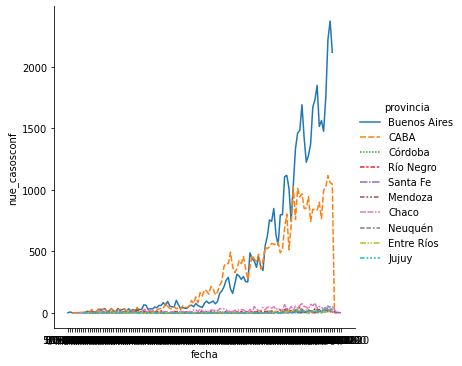

In [123]:
sns.relplot(data=df, x="fecha", y="nue_casosconf", hue="provincia", kind="line", style="provincia")

Se puede observar la curva de crecimiento, pero realmente la fecha es ilegible (tiene un pico hacia abajo que no se sabe porque)

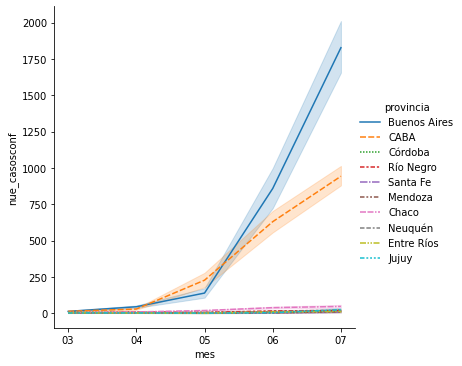

In [125]:
sns.relplot(data=df, x="mes", y="nue_casosconf", hue="provincia", kind="line", style="provincia")

Si agrupo los datos por mes el grafico es mas legible, pero se pierde la curva de crecimiento en dias (con mas picos)

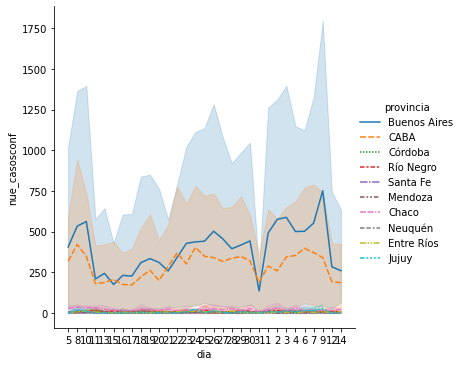

In [118]:
sns.relplot(data=df, x="dia", y="nue_casosconf", hue="provincia", kind="line", style="provincia")

Si agrupo los datos por dia el grafico carece de sentido

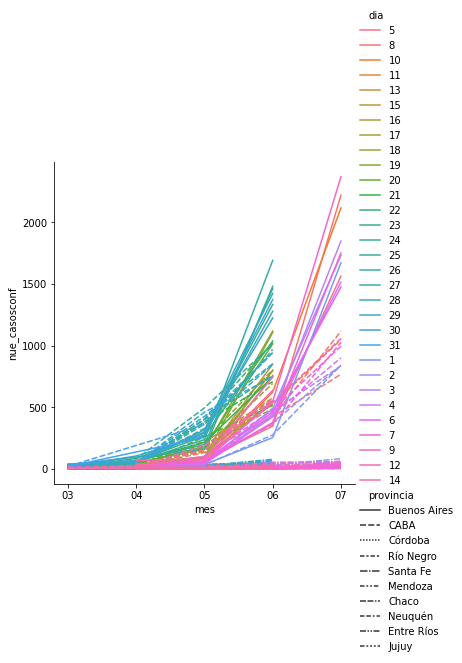

In [126]:
sns.relplot(data=df, x="mes", y="nue_casosconf", hue="dia", kind="line", style="provincia")

Si agrupo los datos por mes pero trato de no perder el dato de los dias, el grafico no se entiende

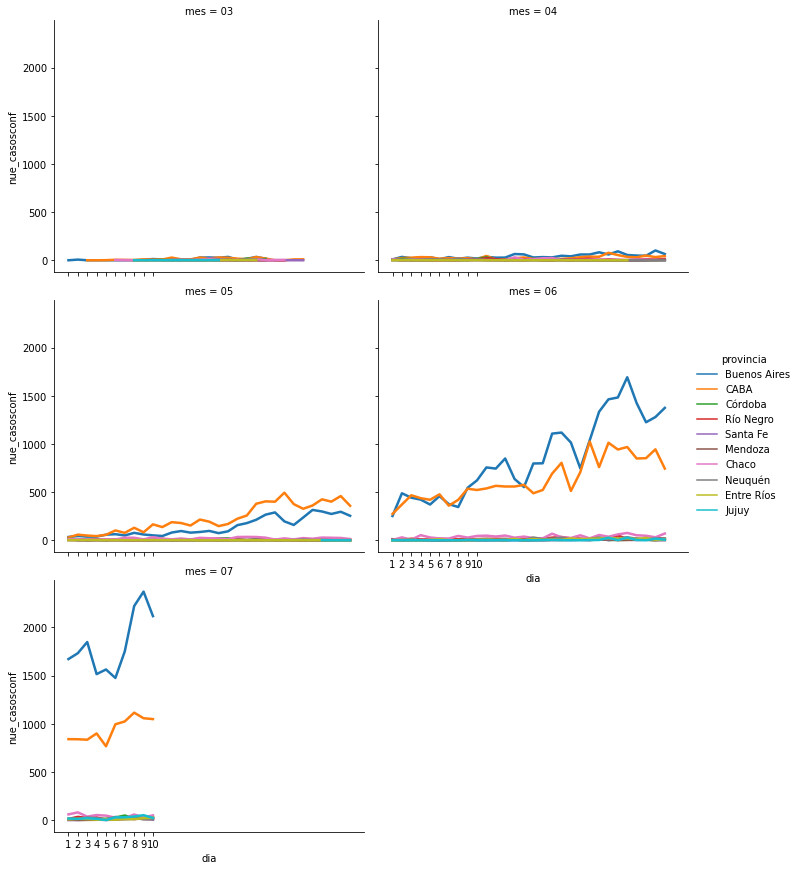

In [148]:
sns.relplot(data=df, x="dia", y="nue_casosconf", hue="provincia", kind="line", col="mes", col_wrap=2,
            height=4, aspect=1.20, linewidth=2.5)

Este es el grafico que queria hacer desde un principio, creo que representa todo de manera bastante legible. Pero por alguna razon no estan identificados los 30 dias del mes, y ademas la escala es igual para los 5 graficos, eso hace que en los primeros dos realmente no se vean los picos. Y para aquellas provincias que no tienen tantos casos quedan todas apretas por la escala del eje "y". 

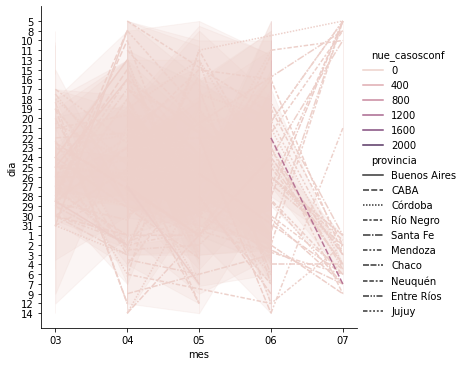

In [142]:
sns.relplot(data=df, x="mes", y="dia", hue="nue_casosconf", kind="line", style="provincia")

Grafico totalmente inentendible, trate de probrar cambiando en donde ponia los parametros. 

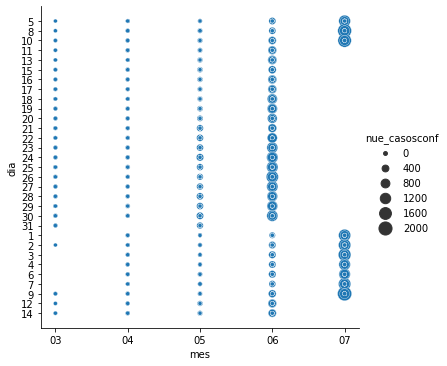

In [146]:
sns.relplot(x="mes", y="dia", size="nue_casosconf", sizes=(15, 200), data=df);

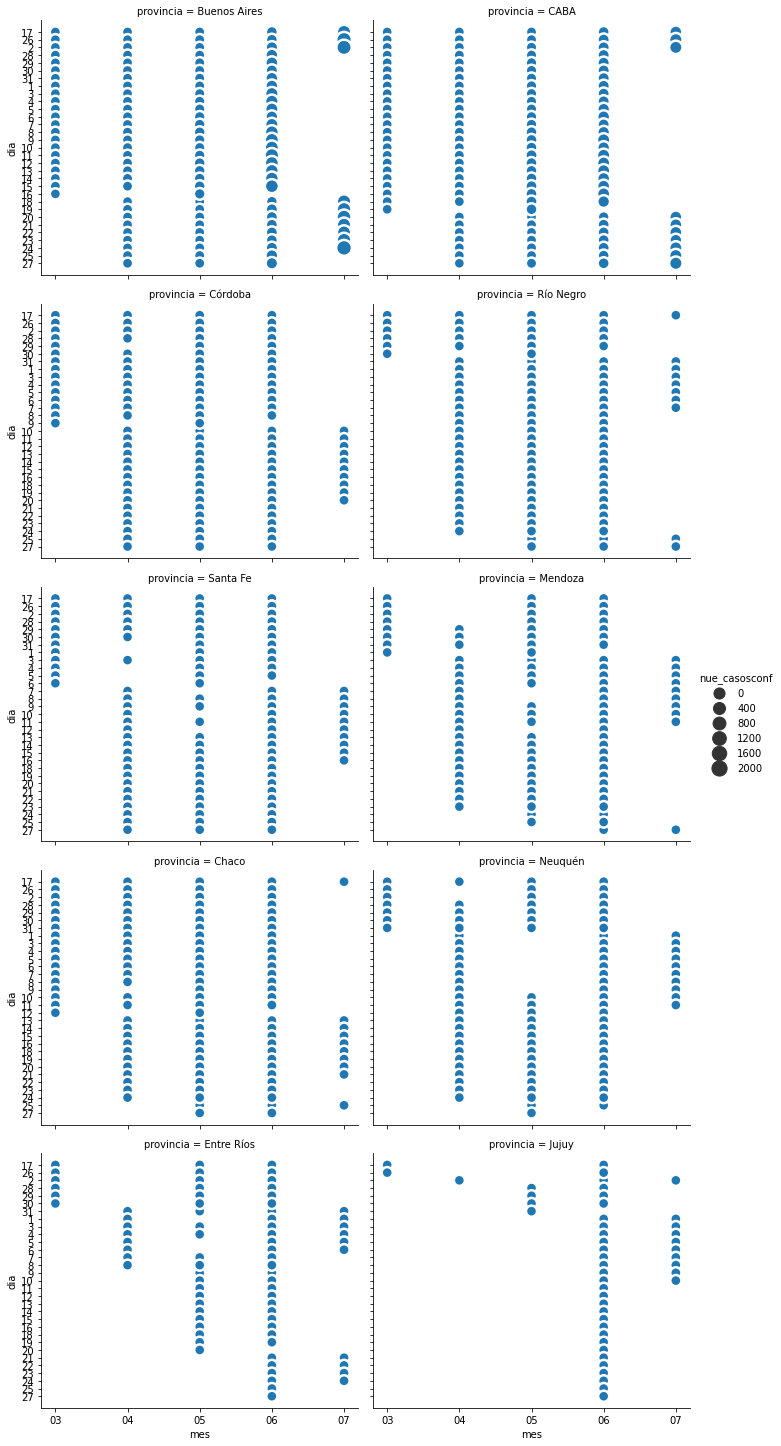

In [147]:
sns.relplot(x="mes", y="dia", size="nue_casosconf", sizes=(123, 250), col="provincia", col_wrap=2,
            height=4, aspect=1.20, linewidth=2.5, data=df);

En estos dos ultimos graficos, se usaron diagramas de dispersion, se pierde la idea de curva de crecimiento. 

### Ovservacion: Habria que ordenar los datos por fecha? Hay que transformar fechas del tipo 5/06/2020 a 05/06/2020? Hay que dar vueltas las fechas para poder ordenarlas (05/07/2020 a 2020/07/05)?